In [1]:
import yt 
yt.mylog.setLevel(50)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ~/project/FLASH4.3_3/object/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/object


In [3]:
import yt
from yt.mods import *
yt.funcs.mylog.setLevel(50) #coerce output null
def plot_dens(i,velocity=False,grid=False,zmin ="",zmax=""):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    if grid: slc.annotate_grids()
    if velocity: slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
    if zmin!="" and zmax!="": slc.set_zlim(physical_quantity,zmin,zmax)
    slc.show()

For the FACTOR = 100 sphere, core formation seemed to happen at t = 9.60E+11 s. So we want to introduce a sink particle at that time. 

In [8]:
FAT_FACTOR = 100
ds = yt.load("../../FLASH4.3_2/object/fat{}/sod_hdf5_chk_0000".format(FAT_FACTOR))
dim = 256
all_data = ds.covering_grid(level=5, left_edge=[0,0.0,0.0],dims=[dim,dim,dim])
rho  = np.max(np.array(all_data["density"]))
print "central density is : ", rho

G = 6.67e-8
c_s  = 28730.5 #cm/s (based on T = 10K) 
jeans_length = sqrt(pi*c_s**2/(G*rho))
boxlen =1e19
lev_max = 5
cell_size = boxlen/(2**(lev_max+2))
rho_threshold = pi*c_s**2/(4*G*jeans_length**2)
r_acc = 2.5*cell_size
rho_threshold=  pi*c_s**2/(4*G*r_acc**2)
print "sink_density_thresh = ", rho_threshold
print "sink_accretion_radius = ", r_acc
print "sink_softening_radius = ", r_acc

central density is :  1.0145485398e-17
sink_density_thresh =  2.54794669312e-19
sink_accretion_radius =  1.953125e+17
sink_softening_radius =  1.953125e+17


I turned off the density refinement criterion, made the $\Delta$ levels smaller

Tried making the blocks bigger but everytime I did this it doesn't even compile 

In [6]:
FAT_FACTOR = 100
ds = yt.load("../../FLASH4.3_2/object/fat{}/sod_hdf5_chk_0000".format(FAT_FACTOR))
dim = 256
all_data = ds.covering_grid(level=5, left_edge=[0,0.0,0.0],dims=[dim,dim,dim])
rho  = np.max(np.array(all_data["density"]))
print "central density is : ", rho

G = 6.67e-8
c_s  = 28730.5 #cm/s (based on T = 10K) 
jeans_length = sqrt(pi*c_s**2/(G*rho))
boxlen =1e19
lev_max = 5
cell_size = boxlen/(2**(lev_max+2))
print "cell_size: ", cell_size
rho_threshold = pi*c_s**2/(4*G*jeans_length**2)
r_acc = 2.5*cell_size
rho_threshold=  pi*c_s**2/(4*G*r_acc**2)
print "sink_density_thresh = ", rho_threshold
print "sink_accretion_radius = ", r_acc
print "sink_softening_radius = ", r_acc

central density is :  1.0145485398e-17
sink_density_thresh =  2.54794669312e-19
sink_accretion_radius =  1.953125e+17
sink_softening_radius =  1.953125e+17


In [18]:
t_core = 30
ds = yt.load("../../FLASH4.3_2/object/fat{}/sod_hdf5_chk_00{}".format(FAT_FACTOR,t_core))
dim = 256
all_data = ds.covering_grid(level=5, left_edge=[0,0.0,0.0],dims=[dim,dim,dim])
rho  = np.max(np.array(all_data["density"]))
print "central density at t_core is : ", rho

central density at t_core is :  1.52133264702e-16


In [21]:
ideal_cell_size = sqrt(pi*c_s**2/(25*rho*G))
print "cell size:", ideal_cell_size

cell size: 3.1972243113e+15


In [22]:
log(boxlen/ideal_cell_size)/log(2.)-2

9.6108924150830308

In [23]:
ideal_cell_size = sqrt(pi*c_s**2/(25*rho*G))
print "cell size:", ideal_cell_size
boxlen = 2.31e18
log(boxlen/ideal_cell_size)/log(2.)-2

cell size: 3.1972243113e+15


7.4968571718370036

In [24]:
FAT_FACTOR = 100
ds = yt.load("../../FLASH4.3_2/object/fat{}/sod_hdf5_chk_0000".format(FAT_FACTOR))
dim = 256
all_data = ds.covering_grid(level=5, left_edge=[0,0.0,0.0],dims=[dim,dim,dim])
rho  = np.max(np.array(all_data["density"]))
print "central density is : ", rho

G = 6.67e-8
c_s  = 28730.5 #cm/s (based on T = 10K) 
jeans_length = sqrt(pi*c_s**2/(G*rho))
boxlen =1e19
lev_max = 8
cell_size = boxlen/(2**(lev_max+2))
print "cell_size: ", cell_size
rho_threshold = pi*c_s**2/(4*G*jeans_length**2)
r_acc = 2.5*cell_size
rho_threshold=  pi*c_s**2/(4*G*r_acc**2)
print "sink_density_thresh = ", rho_threshold
print "sink_accretion_radius = ", r_acc
print "sink_softening_radius = ", r_acc

central density is :  1.0145485398e-17
cell_size:  9.765625e+15
sink_density_thresh =  1.6306858836e-17
sink_accretion_radius =  2.44140625e+16
sink_softening_radius =  2.44140625e+16



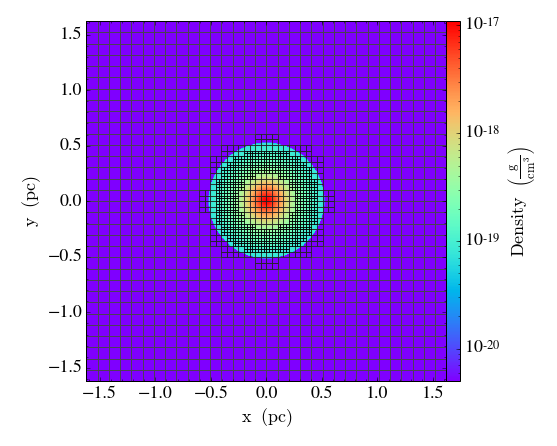

In [25]:
plot_dens(0,grid=True)


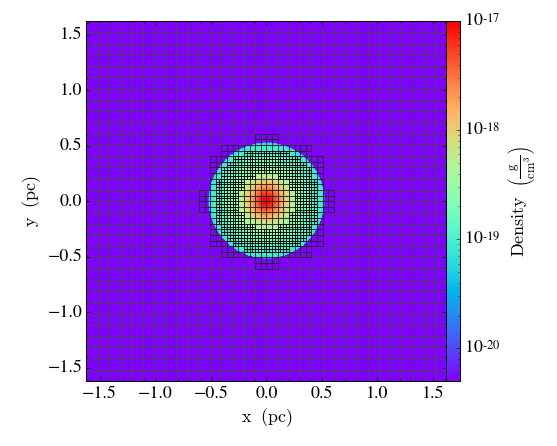


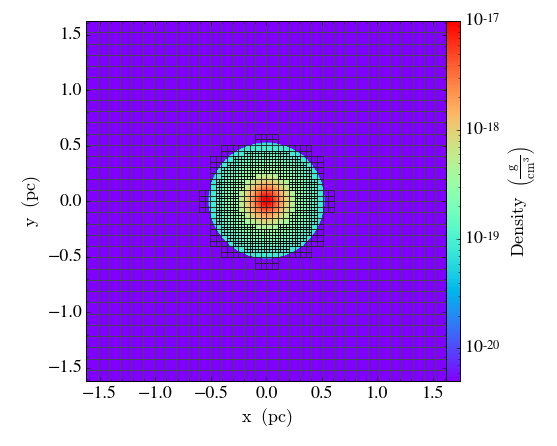


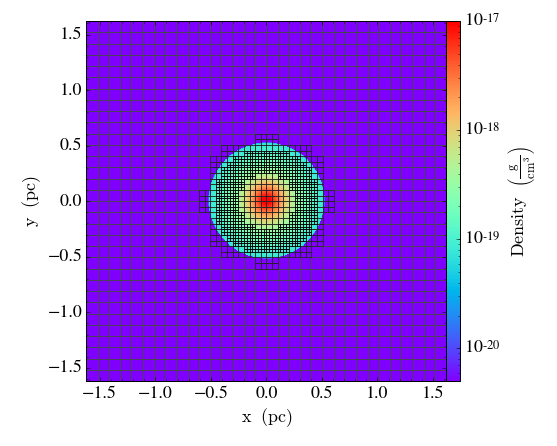


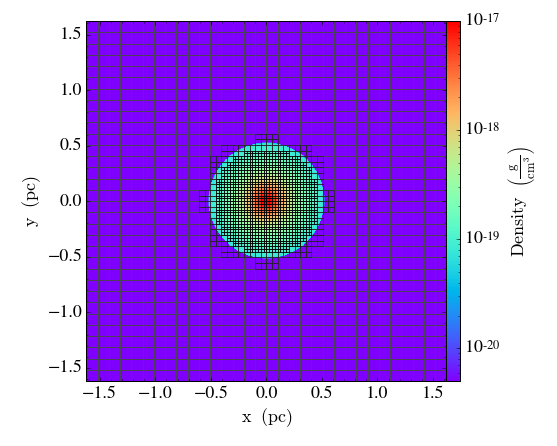


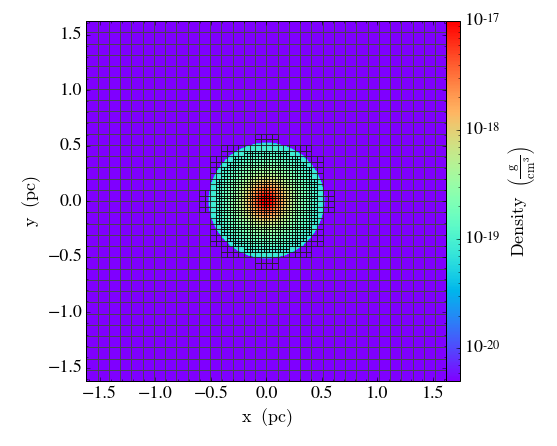


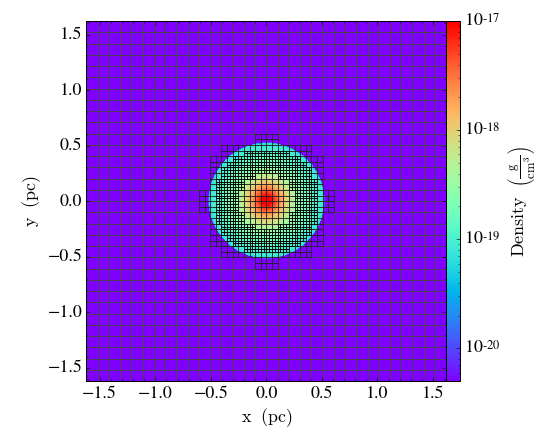


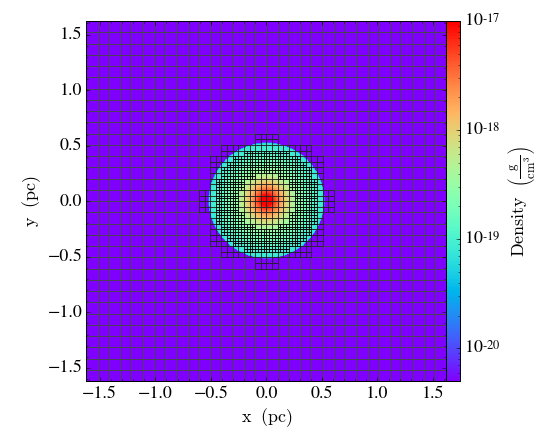


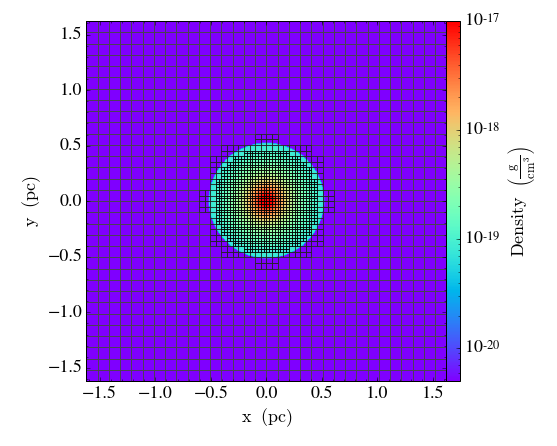


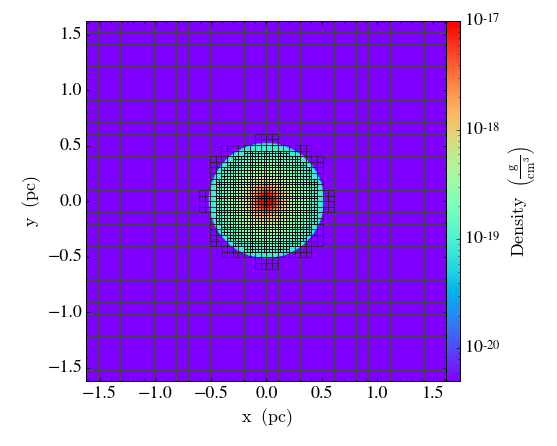


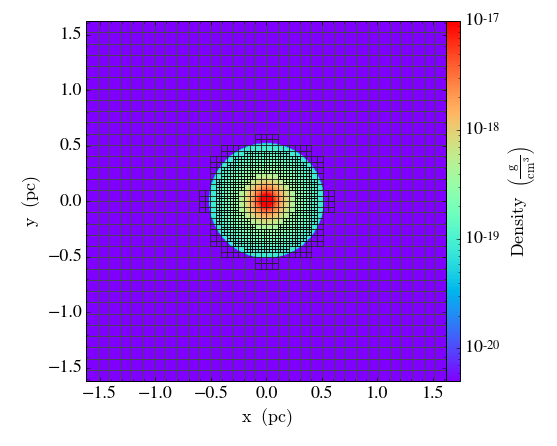


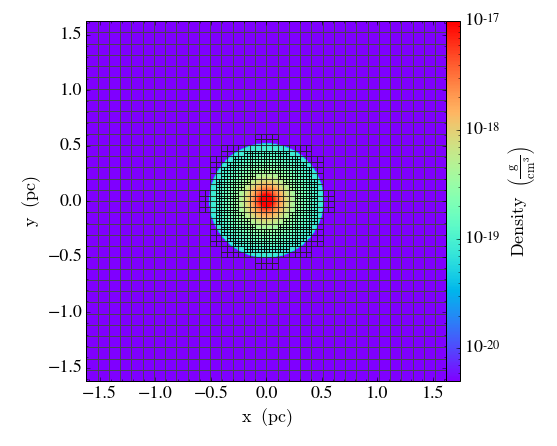


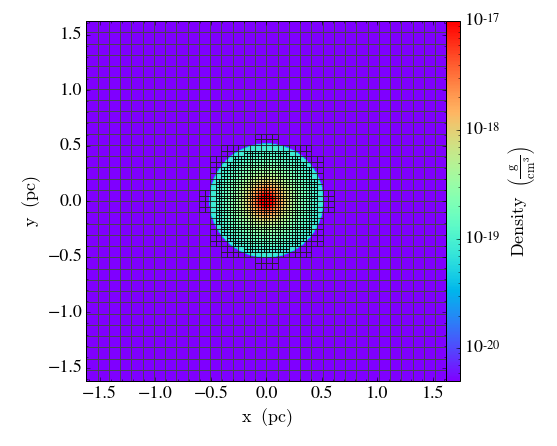

In [31]:
FINAL_STEP = 35
for i in np.arange(FINAL_STEP):
    if i%3==0:
        plot_dens(i,grid=True,zmin = 5e-21,zmax=1e-17)

The result above is from setting boxlen = 1.5 pcs (1e19 cm), which is why it looks so fine and also it halts at t=34 timestep. It doesn't stop but just stalls there when I do the restart. (vim 458697.out)

Now using boxlen = 2.31e18 cm (0.75pcs) and level =6~8


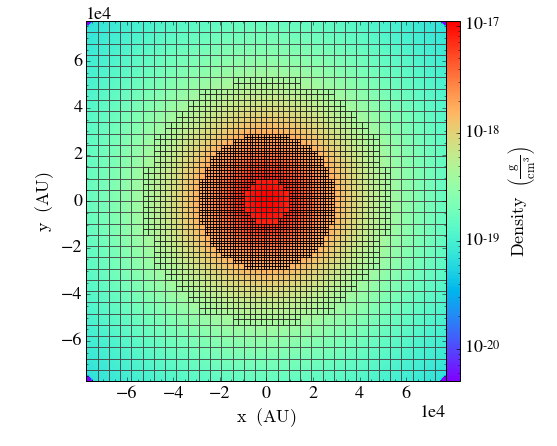

In [32]:
plot_dens(0,grid=True)

Not sure why this is too big, using 1pcs instead 

Now using boxlen = 3.086e18 cm  and level =6~8


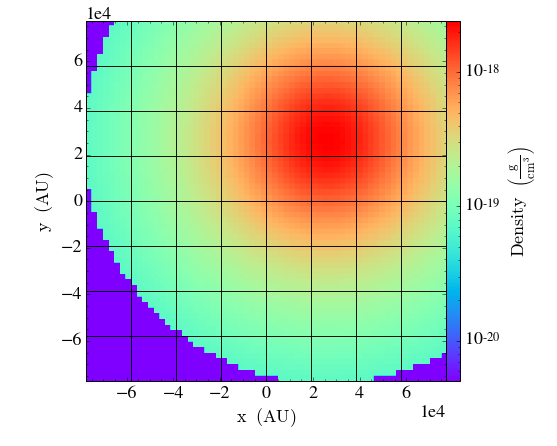

In [4]:
plot_dens(0,grid=True)

Takes about 20 minutes to initialize the grid 6~8 lev 


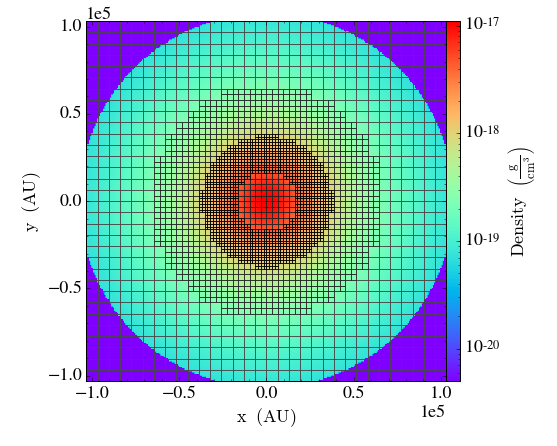

In [4]:
plot_dens(0,grid=True)

 boxlen = 4.0e18 cm


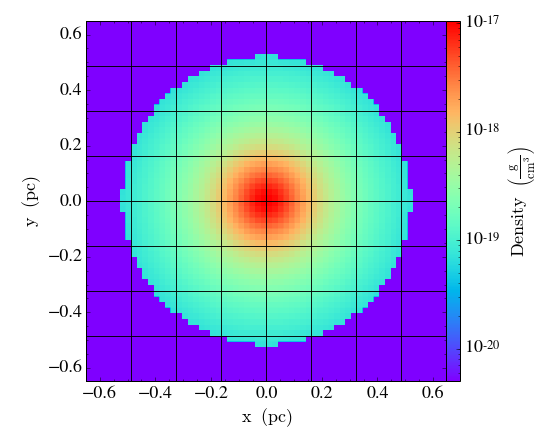

In [5]:
plot_dens(0,grid=True)

In [11]:
t_core = 30
ds = yt.load("../../FLASH4.3_2/object/fat{}/sod_hdf5_chk_00{}".format(FAT_FACTOR,t_core))
dim = 256
all_data = ds.covering_grid(level=5, left_edge=[0,0.0,0.0],dims=[dim,dim,dim])
rho  = np.max(np.array(all_data["density"]))
print "central density at t_core is : ", rho

central density at t_core is :  1.52133264702e-16


In [12]:
ideal_cell_size = sqrt(pi*c_s**2/(25*rho*G))
print "cell size:", ideal_cell_size
boxlen = 4e18
log(boxlen/ideal_cell_size)/log(2.)-2

cell size: 3.1972243113e+15


8.2889643201956709


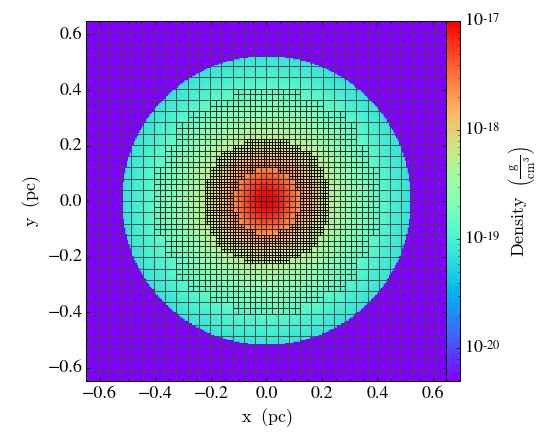


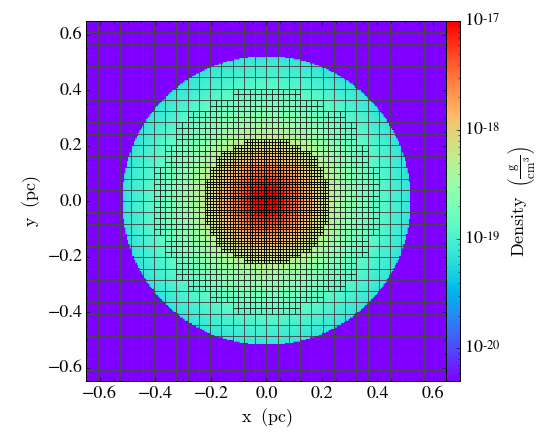


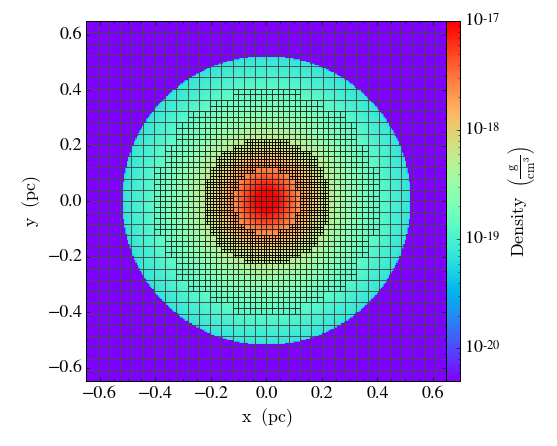


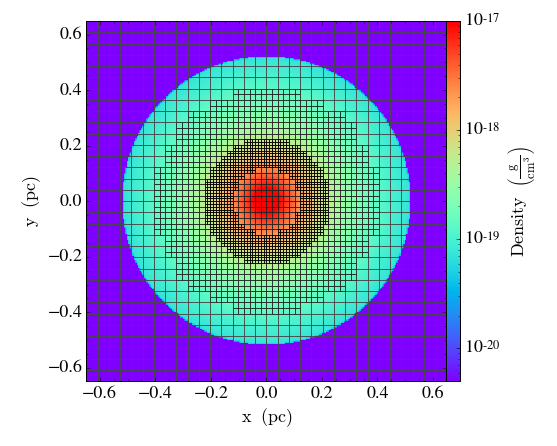


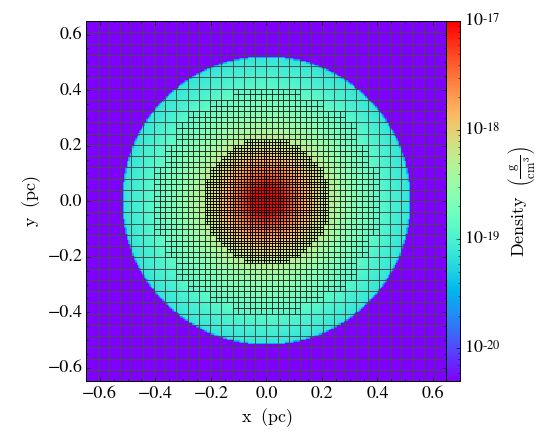


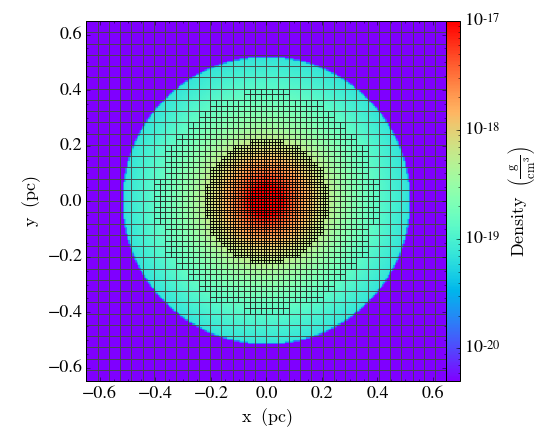


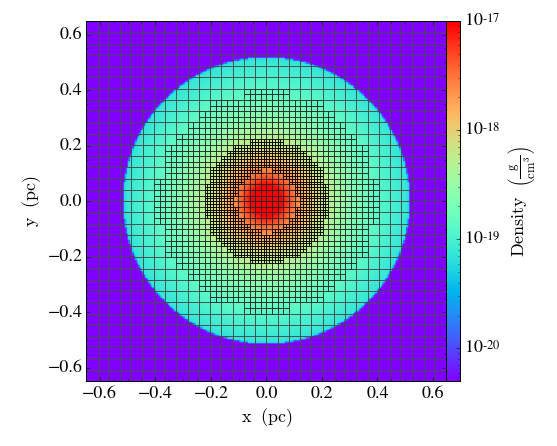


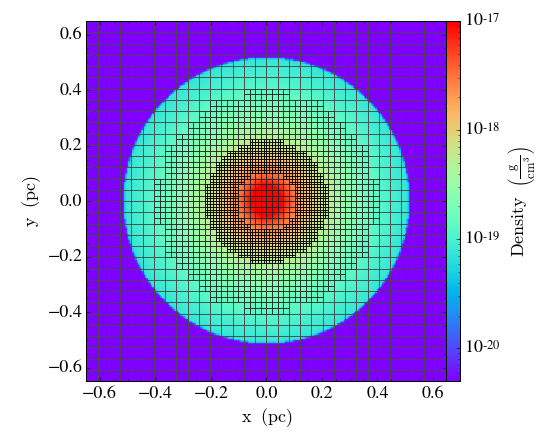

In [6]:
FINAL_STEP = 40
for i in np.arange(FINAL_STEP):
    if i%5==0:
        plot_dens(i,grid=True,zmin = 5e-21,zmax=1e-17)


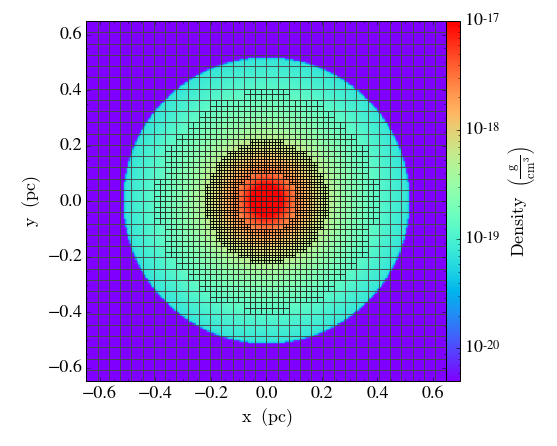

In [9]:
plot_dens(34,grid=True,zmin = 5e-21,zmax=1e-17)


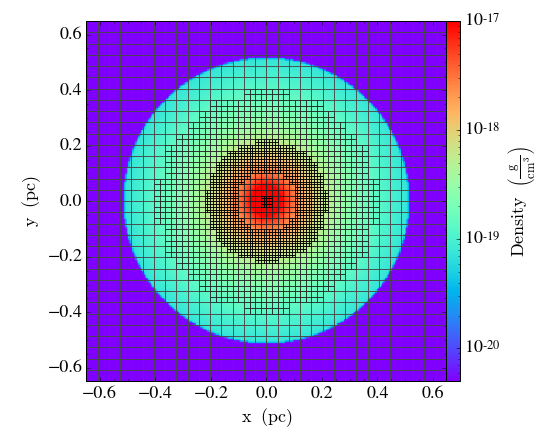

In [8]:
plot_dens(38,grid=True,zmin = 5e-21,zmax=1e-17)


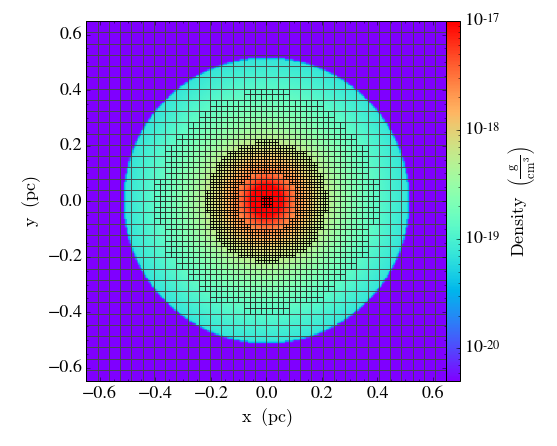

In [7]:
plot_dens(39,grid=True,zmin = 5e-21,zmax=1e-17)


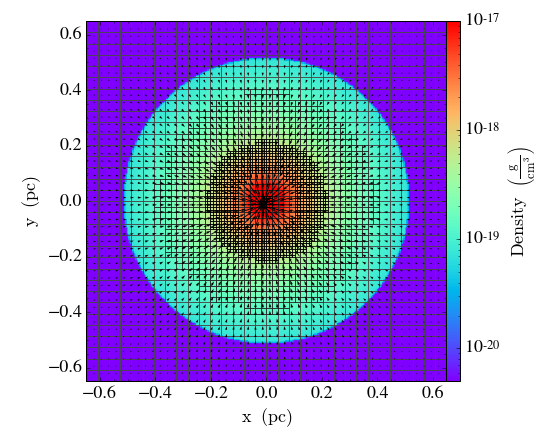

In [10]:
plot_dens(39,velocity=True, grid=True,zmin = 5e-21,zmax=1e-17)